# <center>**Classification of Diabetes**</center></h1>
## <center>Data intensive application programming project - 2022/2023</center></h2>
### <center>Salvatore Antonio Addimando <br/> salvatore.addimando@studio.unibo.it <br/> ID: 970539 <br/> <br/> Benedetta Pacilli <br/> benedetta.pacilli@studio.unibo.it <br/> ID: 975296 </center></h3>


### Libraries import

First of all, we import the libraries to perform operations on data
+ NumPy to create and operate on N-dimensional arrays
+ pandas to load and manipulate in tabular format

In [1]:
import numpy as np
import pandas as pd

Other libraries will be imported later, when needed.

### Data import
The dataset used for this project is the [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) from Kaggle. It is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The dataset is composed of 100,000 rows and 9 columns, each row representing a patient and each column a medical feature of the patient, except for the target feature. The features are the following:

+ **Age**: the age of the patient in years
+ **Gender**: Female, Male or Other
+ **BMI**: Body Mass Index
+ **Hypertention**: a medical condition in which the blood pressure in the arteries is persistently elevated, the column specifies if the patient has hypertension or not
+ **Heart Disease**: a medical condition in which the heart's ability to pump blood is reduced, the column specifies if the patient has heart disease or not
+ **Smoking History**: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated. It can take the following values:
    + **never**
    + **ever**
    + **former**
    + **current**
    + **not current**
    + **No Info**
+ **HbA1c level**: measure of a person's average blood sugar level over the past 2-3 months.
+ **Blood Glucose Level**: the concentration of glucose present in the blood of a patient
+ **Diabets**: the target column, it specifies if the patient has diabetes or not

The variable we want to predict is the last one, **Diabetes**. It is a binary variable, so we are dealing with a binary classification problem.

Now we can load the dataset. To load the dataset we need to import the os library to get the path of the dataset and the kaggle library to download the dataset directly from Kaggle. Pandas is used to read the dataset file.

In [2]:
import os.path as os
import kaggle

if not os.exists("diabetes_prediction_dataset.csv"):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        'iammustafatz/diabetes-prediction-dataset', path='.', unzip=True)
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

We now show some more information about the dataset by using the pandas functions `info()` and `head()`.

In [3]:
dataset.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 9 entries, gender to diabetes
dtypes: float64(3), int64(4), object(2)
memory usage: 17.3 MB


In [4]:
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data manipulation and analysis
We now perform some operations on the dataset to better understand it and to prepare it for analysis. First, we check if there are any missing values in the dataset.

In [5]:
if dataset.isnull().values.any():
    print("Missing values found")
    # Removing missing values
    dataset = dataset.dropna()
    print("Missing values removed")
else:
    print("No missing values found")

No missing values found


We can see that there are no missing values in the dataset, so we can proceed with the analysis. We now check the type of each variable in the dataset.

In [6]:
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

All variables already have compatible data types.

In our model we want to only include the variables that have an impact on the prediction. To do so we create *n* plots (*n* = numbers of variables - diabetes), each one showing the relationship between the *n<sup>th</sup>* variable (on the x axis) and diabetes (on the y axis).

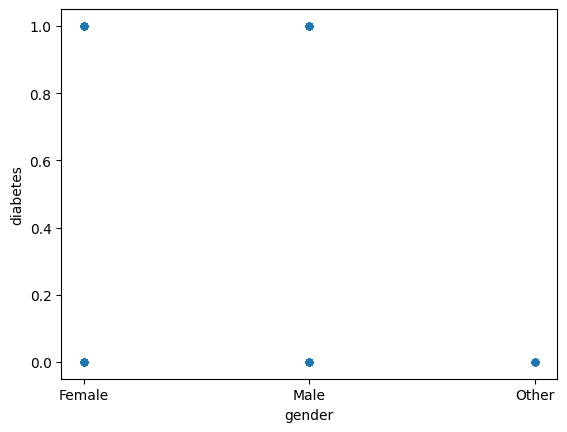

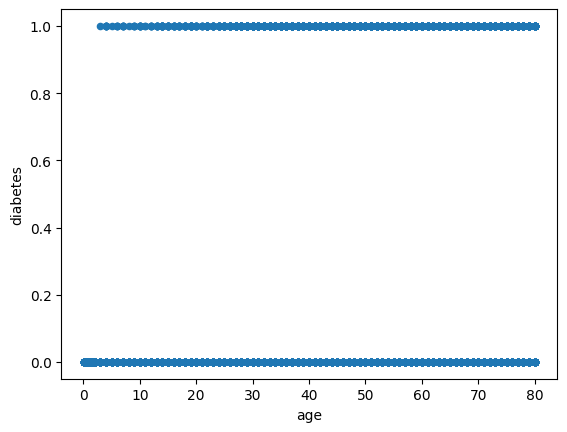

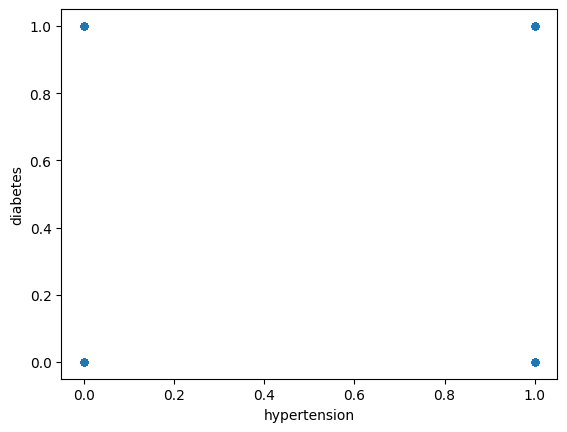

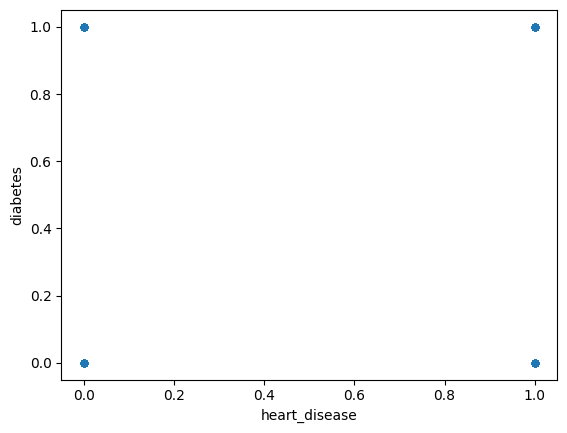

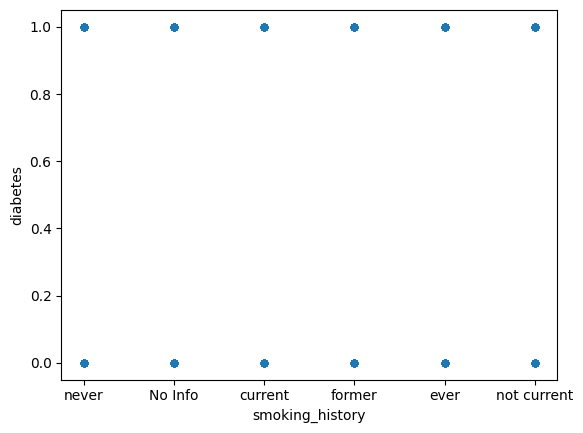

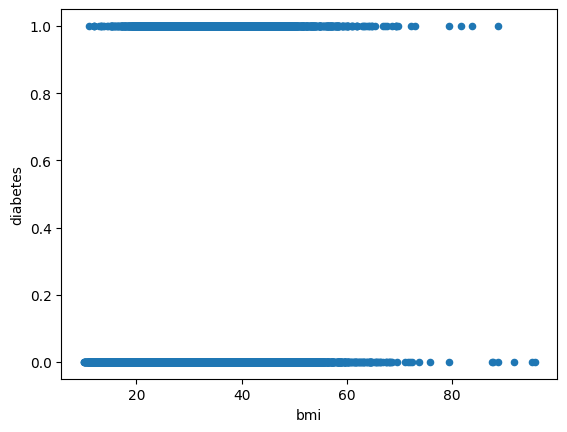

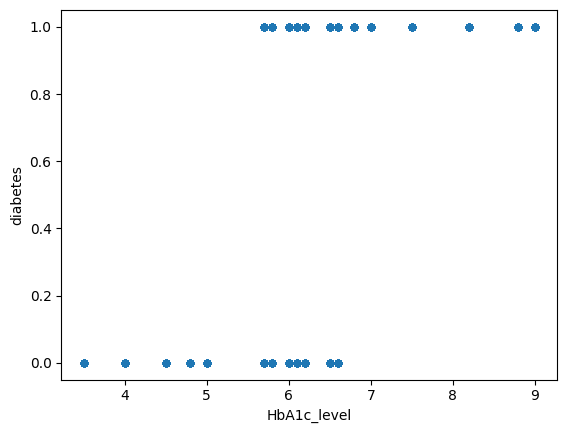

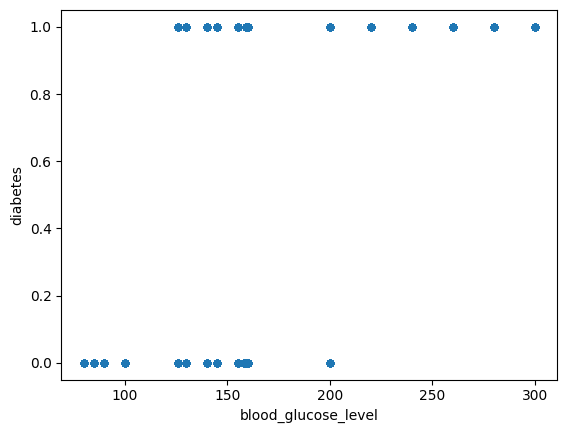

In [7]:
import matplotlib.pyplot as plt

for column in dataset.columns.drop('diabetes'):
    dataset.plot.scatter(x=column, y='diabetes').get_figure()

We reckon that all variables have an impact on the prediction, so we will include all of them in the model. We can also see, from the last two plots, that with HbA1c and blood glucose level there is a transition point where the probability of having diabetes switches from 0 to 1.

We now report some statistics and graphs about the variables:

In [9]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In the following plots we will explore the distribution of the target variable.

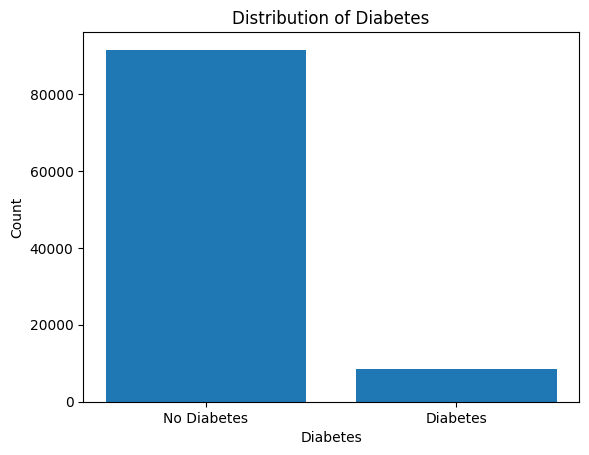

In [15]:
diabetes_counts = dataset['diabetes'].value_counts()
labels = ['No Diabetes', 'Diabetes']
plt.bar(labels, diabetes_counts)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes');

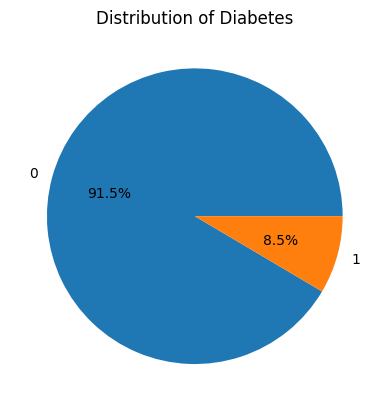

In [17]:
counts = dataset['diabetes'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Diabetes');

Both the histogram and the pie chart show that the dataset is unbalanced, with the number of negative cases being much higher than the number of positive cases.

The first next group of plots shows the distribution of the numerical variables for the positive cases, while the second next group shows the relationship between the numerical variables and the positive cases of the target variable.

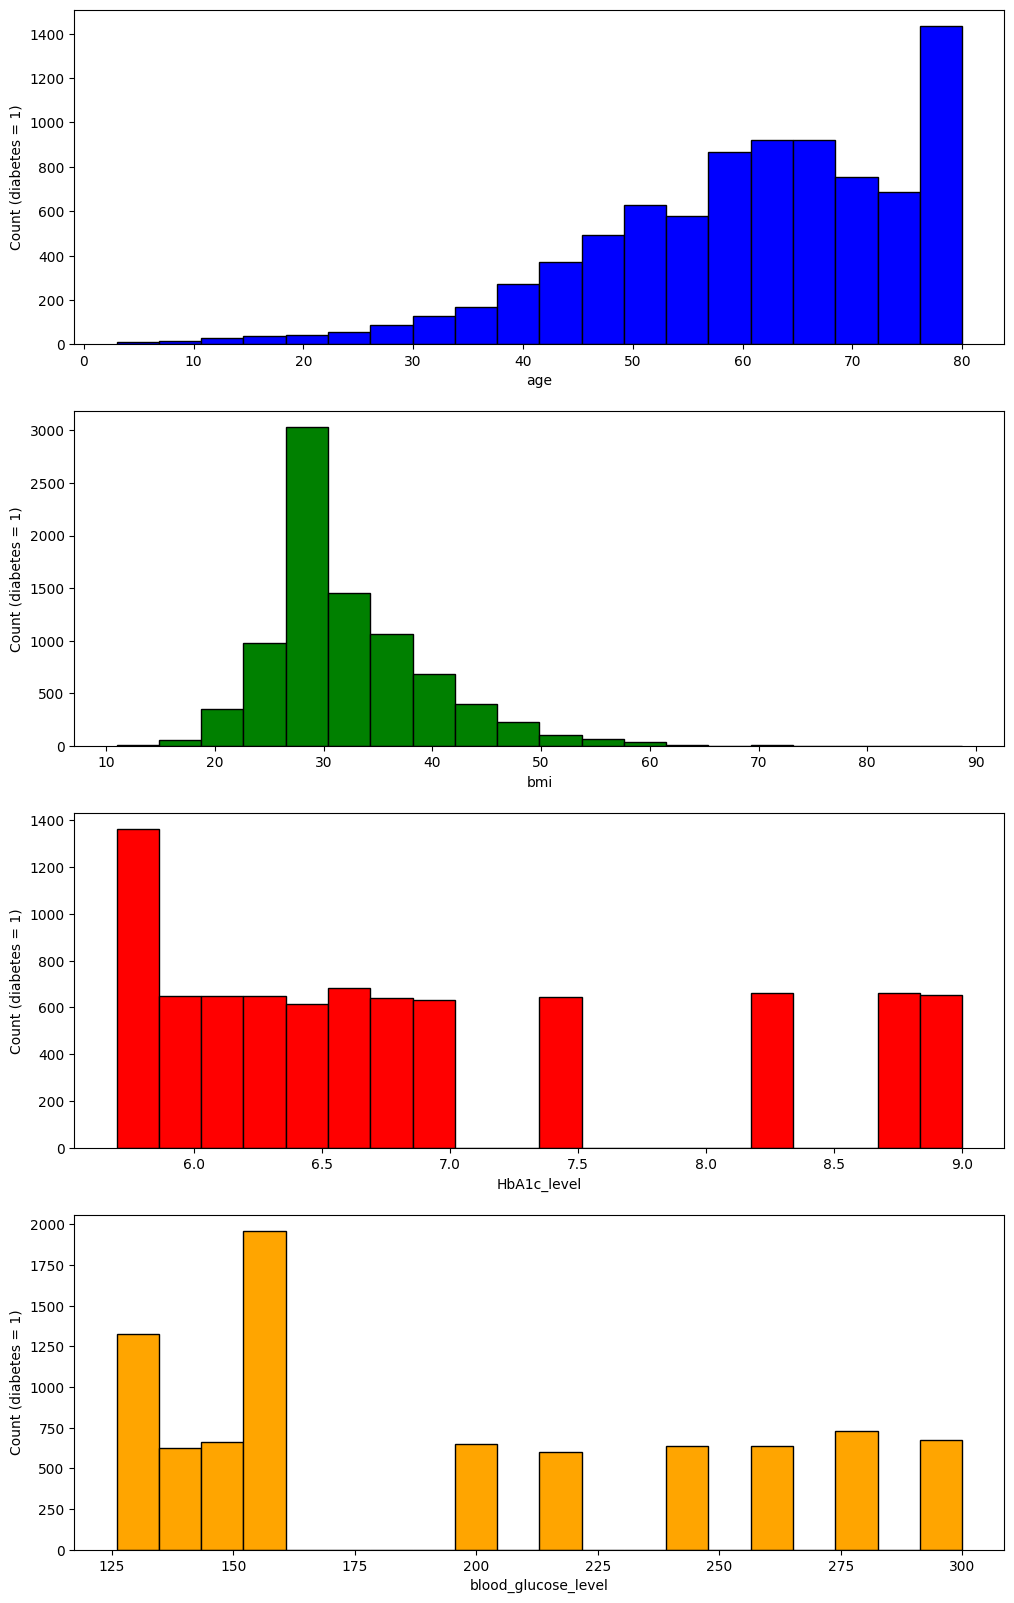

In [40]:
numeric_variables = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
num_rows = len(numeric_variables)
colors = ['blue', 'green', 'red', 'orange']
fig, axes = plt.subplots(num_rows, 1, figsize=(12, num_rows * 5))

for i, variable in enumerate(numeric_variables):
    ax = axes[i]
    filtered_data = dataset[dataset['diabetes'] == 1][variable]
    color = colors[i % len(colors)]
    ax.hist(filtered_data, bins=20, color=color, edgecolor='black')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count (diabetes = 1)')

From the first histogram we can observe that the age distribution is quite uniform, with a slight increase in the number of patients around 80 years old.
The second histogram shows that the BMI distribution is left-skewed, with a peak in the 25-35 range. This makes perfect sense as a BMI between 25 and 35 is considered overweight and diabetes is more common in overweight people.
The third histogram, about the HbA1 level, shows that diabetic patients always had a HbA1c level of at least 5.8% as, usually, a HbA1c level of 6% or less is considered normal.
The fourth and last histogram shows that the blood glucose level distribution is left-skewed, with a peak around 150. We also observe that the diabetic patients have a blood glucose level of at least 125, as a blood glucose level is considered normal from 70 mg/dL to 100 mg/dL and, usually, a blood glucose level of 126 mg/dL or more indicates diabetes.

The box plots confirm what we have seen in the histograms:

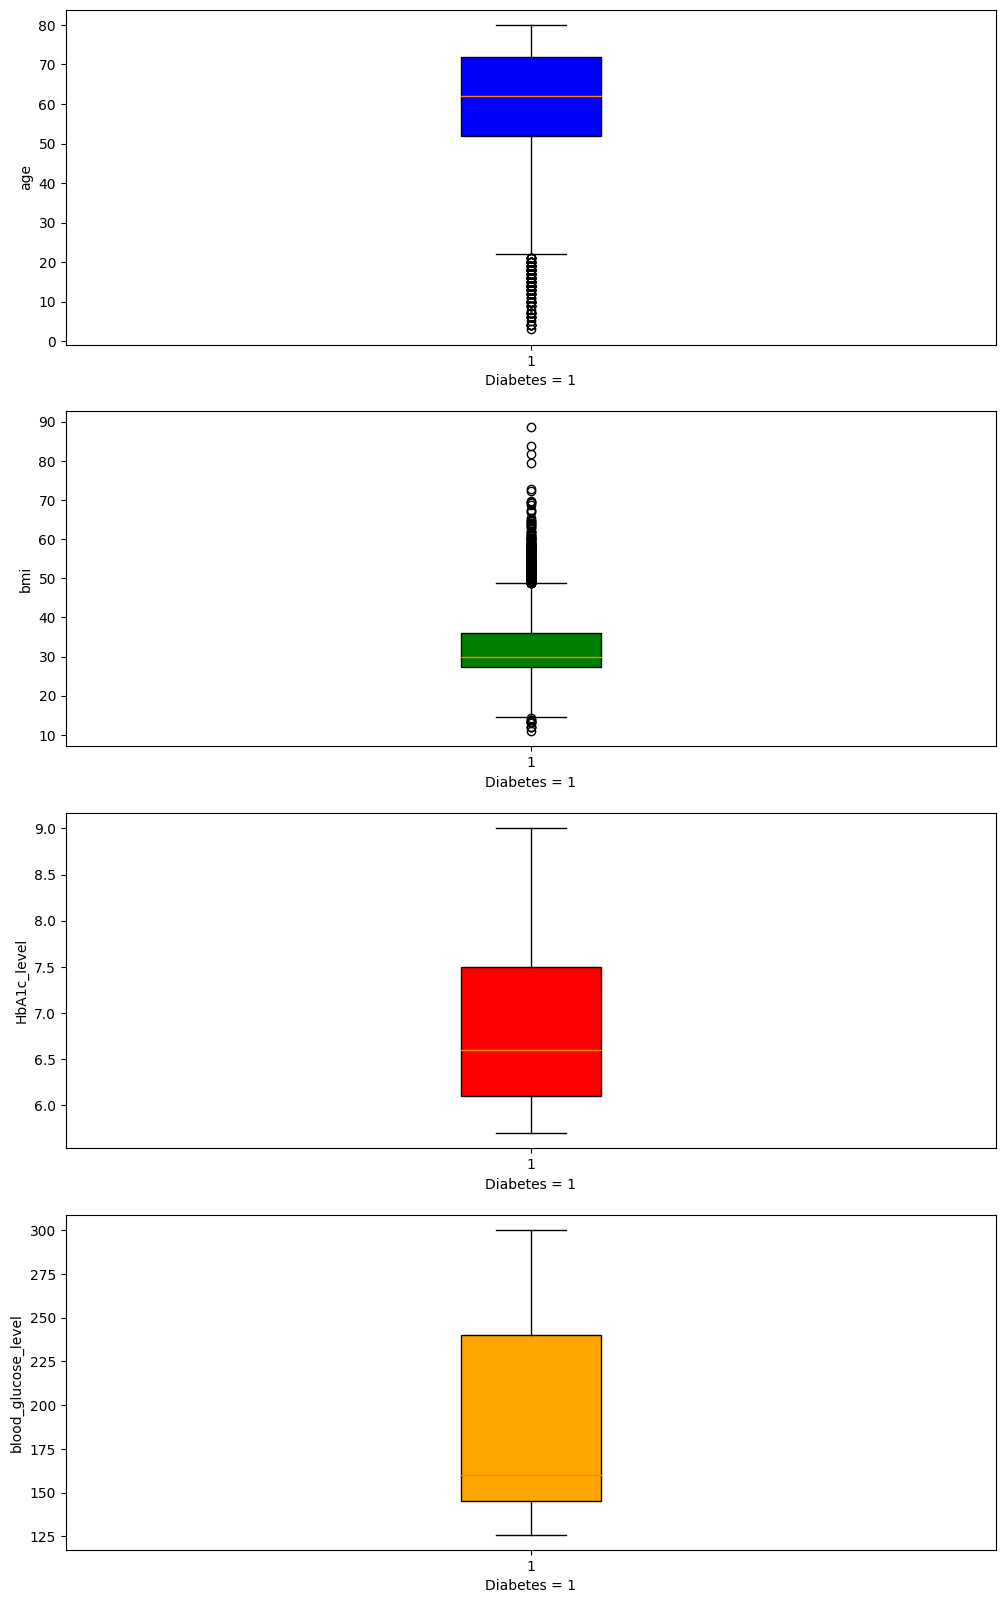

In [49]:
numeric_variables = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
num_rows = len(numeric_variables)
colors = ['blue', 'green', 'red', 'orange']
fig, axes = plt.subplots(num_rows, 1, figsize=(12, num_rows * 5))

for i, variable in enumerate(numeric_variables):
    ax = axes[i]
    filtered_data = dataset[dataset['diabetes'] == 1][variable]
    color = colors[i % len(colors)]
    ax.boxplot(filtered_data, patch_artist=True, boxprops=dict(facecolor=color, edgecolor='black', linewidth=1.0))
    ax.set_xlabel('Diabetes = 1')
    ax.set_ylabel(variable)


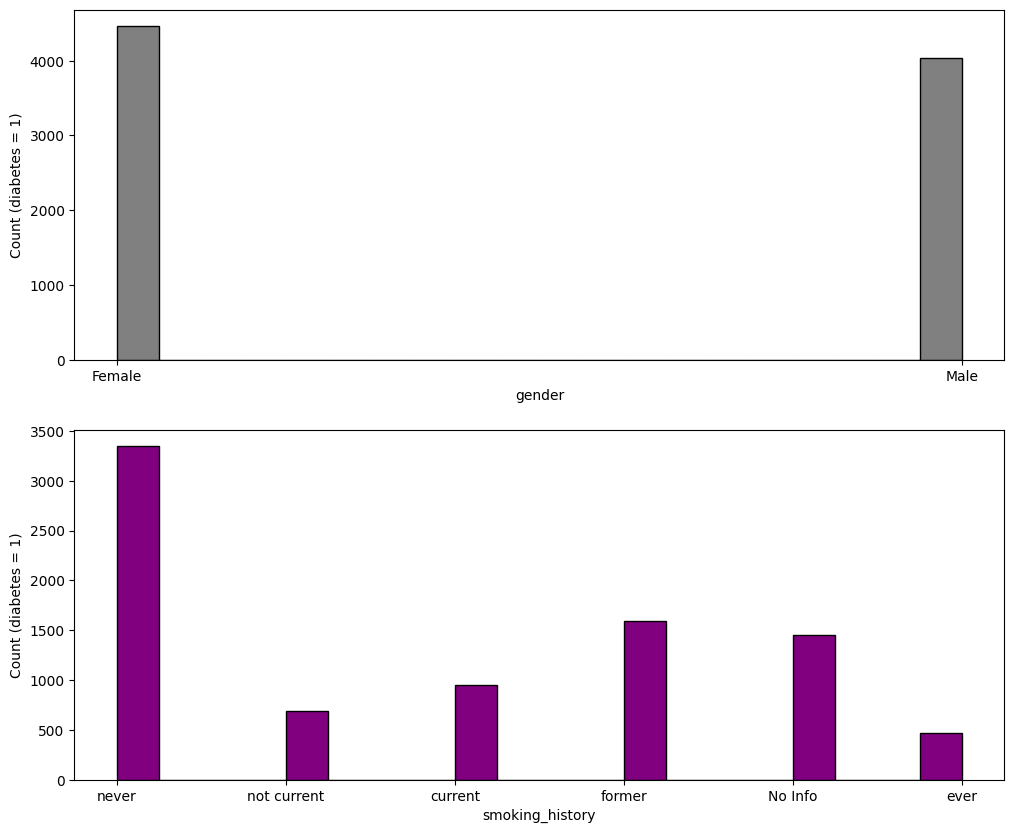

In [54]:
categorical_variables = ['gender', 'smoking_history']
num_rows = len(categorical_variables)
colors = ['gray', 'purple']
fig, axes = plt.subplots(num_rows, 1, figsize=(12, num_rows * 5))

for i, variable in enumerate(categorical_variables):
    ax = axes[i]
    filtered_data = dataset[dataset['diabetes'] == 1][variable]
    color = colors[i % len(colors)]
    ax.hist(filtered_data, bins=20, color=color, edgecolor='black')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count (diabetes = 1)')

The histogram regarding gender shows how the cases of diabetic patients are almost perfectly distributed between males and females.
The Smoking History histogram shows that the majority of diabetic patients have never smoked, followed by former smokers. It is not surprising as smoking can be a risk factor for diabetes but it is not the main one.

#### Data preparation

We first divide the remaining variables in three sets:
+ **Numerical columns**: columns that contain numerical values
+ **Binary columns**: columns that contain boolean values
+ **Categorical columns**: columns that contain categorical values

In [57]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

binary_columns = ['hypertension', 'heart_disease']

categorical_columns = ['gender', 'smoking_history']

We now separate the dataset into the training set and the test set with a 80:20 ratio. We use the function `train_test_split()` from the sklearn library to do so.

We are also going to remove the target column from the test set, as we don't want to use it to predict the target.

In [56]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

x_train = train_set.drop(columns=['diabetes'])
y_train = train_set['diabetes']
x_test = test_set.drop(columns=['diabetes'])
y_test = test_set['diabetes']

### Creating the model

We now create the model. We are going to try different strategies to see which one performs better. We will use the following models:
+ **Logistic Regression**
+ **Decision Tree Classifier**
+ **Random Forest Classifier**

In order to compare the different models we will use the following metrics:
+ **R squared (R<sup>2</sup>)**: the coefficient of determination
+ **Confusion matrix**: a table that often used to describe the performance of a classification model on a set of test data for which the true values are known
+ **Precision**: the ratio of correctly predicted positive observations to the total predicted positive observations
+ **Recall**: the ratio of correctly predicted positive observations to the all observations in actual class
+ **F1 score**: the harmonic mean of precision and recall

In order to calculate these metrics we will use the following functions from the sklearn library:

In [63]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

#### Testing Logistic Regression

In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model_lr = Pipeline([
    ('preproc', ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), numerical_columns),
        ('onehot', OneHotEncoder(), categorical_columns),
        ('passthrough', 'passthrough', binary_columns)
    ], verbose=True)),
    ('model', LogisticRegression(C=0.1, solver='saga', penalty='l1'))
])

model_lr.fit(x_train, y_train)

print("R^2 score on training set:")
print(model_lr.score(x_train, y_train))
print("R^2 score on test set:")
print(model_lr.score(x_test, y_test))

predicted = model_lr.predict(x_test)
cm = confusion_matrix(y_test, predicted)
cm = pd.DataFrame(cm, index=model_lr.classes_, columns=model_lr.classes_)

print("Confusion matrix:")
print(cm)

print("Precision on test set:")
print(precision_score(y_test, predicted))

print("Recall on test set:")
print(recall_score(y_test, predicted))

print("F1 score on test set:")
print(f1_score(y_test, predicted))

[ColumnTransformer] ........ (1 of 3) Processing scaler, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ... (3 of 3) Processing passthrough, total=   0.0s
R^2 score on training set:
0.96065
R^2 score on test set:
0.9589
Confusion matrix:
       0     1
0  18128   164
1    658  1050
Precision on test set:
0.8649093904448105
Recall on test set:
0.6147540983606558
F1 score on test set:
0.7186858316221766


c:\Users\bened\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The results from the logistic regression model are not bad, but we can do better.
We are going to try to improve the model by using the `GridSearchCV()` function from the sklearn library to find the classifier.

#### Choosing the model with Grid Search

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {
    'model': [LogisticRegression(C=0.1, solver='saga', penalty='l1'), DecisionTreeClassifier(), RandomForestClassifier()],
}

grid_search = GridSearchCV(model_lr, grid, cv=5, verbose=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[ColumnTransformer] ........ (1 of 3) Processing scaler, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ... (3 of 3) Processing passthrough, total=   0.0s
{'model': RandomForestClassifier()}


The grid search returned `RandomForestClassifier()` as the best classifier. We will now create a new grid search to find the best parameters for the random forest classifier.

#### Grid Search for Random Forest Classifier

In [ ]:
model_rfc = Pipeline([
    ('preproc', ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), numerical_columns),
        ('onehot', OneHotEncoder(), categorical_columns),
        ('passthrough', 'passthrough', binary_columns)
    ], verbose=True)),
    ('model', RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='gini', max_features='sqrt', n_estimators=300))
])

grid = {
    'model__max_depth': [80, 90, 100, 110],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model_rfc, grid, cv=5, verbose=3, n_jobs=-1)

grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

We will now use all the parameters found by the grid search to create the random forest classifier.

#### Creating the best model

In [70]:
model_rfc = Pipeline([
    ('preproc', ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), numerical_columns),
        ('onehot', OneHotEncoder(), categorical_columns),
        ('passthrough', 'passthrough', binary_columns)
    ], verbose=True)),
    ('model', RandomForestClassifier(n_jobs=-1, bootstrap=True, criterion='gini',
     max_features='sqrt', n_estimators=300, max_depth=90, min_samples_leaf=2, min_samples_split=10))
])

model_rfc.fit(x_train, y_train)

print("R^2 score on training set:")
print(model_rfc.score(x_train, y_train))
print("R^2 score on test set:")
print(model_rfc.score(x_test, y_test))

predicted = model_rfc.predict(x_test)
cm = confusion_matrix(y_test, predicted)
cm = pd.DataFrame(cm, index=model_rfc.classes_, columns=model_rfc.classes_)

print("Confusion matrix:")
print(cm)

print("Precision on test set:")
print(precision_score(y_test, predicted))

print("Recall on test set:")
print(recall_score(y_test, predicted))

print("F1 score on test set:")
print(f1_score(y_test, predicted))

[ColumnTransformer] ........ (1 of 3) Processing scaler, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ... (3 of 3) Processing passthrough, total=   0.0s
R^2 score on training set:
0.9751875
R^2 score on test set:
0.9724
Confusion matrix:
       0     1
0  18286     6
1    546  1162
Precision on test set:
0.9948630136986302
Recall on test set:
0.680327868852459
F1 score on test set:
0.808066759388039


We can see that all the scores obtained with the best model are very good and they are better than the ones obtained with the logistic regression model.

### Using the best model
We leave a real life case scenario where we use the best model to predict if a patient has diabetes or not:

In [71]:
test = pd.DataFrame([["Male", 21, 0, 0, "current", 21.7, 6, 75.2]], columns=[
                    'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

print("Prediction:")
print(model_rfc.predict(test))

Prediction:
[0]


The prediction is correct, as the patient does not have diabetes.